In [149]:
import pandas as pd
df_ndxt = pd.read_csv("IXIC.csv")

In [150]:
df = pd.read_csv('US_confirmed.csv')
df_usc = df.drop(columns=['State']).T

In [151]:
df_usc = df_usc.diff().fillna(df_usc.iloc[0])

In [152]:
df_usc['cases'] = df_usc.sum(axis=1)
df_usc['date'] = df_usc.index

In [153]:
df_us_cases = df_usc[['cases','date']]

In [154]:
df_ndxt = df_ndxt[['Date','Close']]

In [155]:
df_merged = pd.merge(left=df_ndxt, right=df_us_cases, left_on='Date', right_on='date')

In [156]:
x = df_merged['Close'].to_numpy()
y = df_merged['cases'].to_numpy()
z = df_merged['date'].to_numpy()

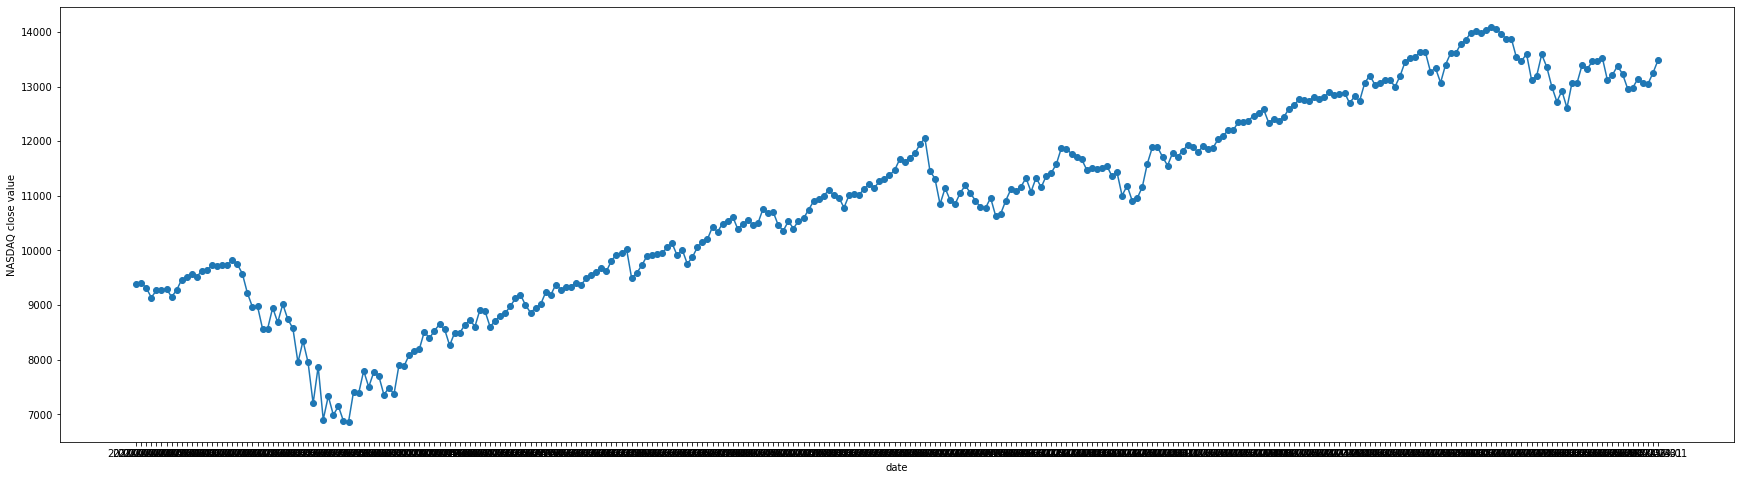

In [157]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(z,x)
plt.plot(z,x)
#plt.plot(z,y)
# plt.axvline(x=x,ymin=min(z),ymax=max(z),color='g',linewidth=1)

plt.rcParams["figure.figsize"] = (30,8)
plt.ylabel("NASDAQ close value")
plt.xlabel("date")
plt.show()

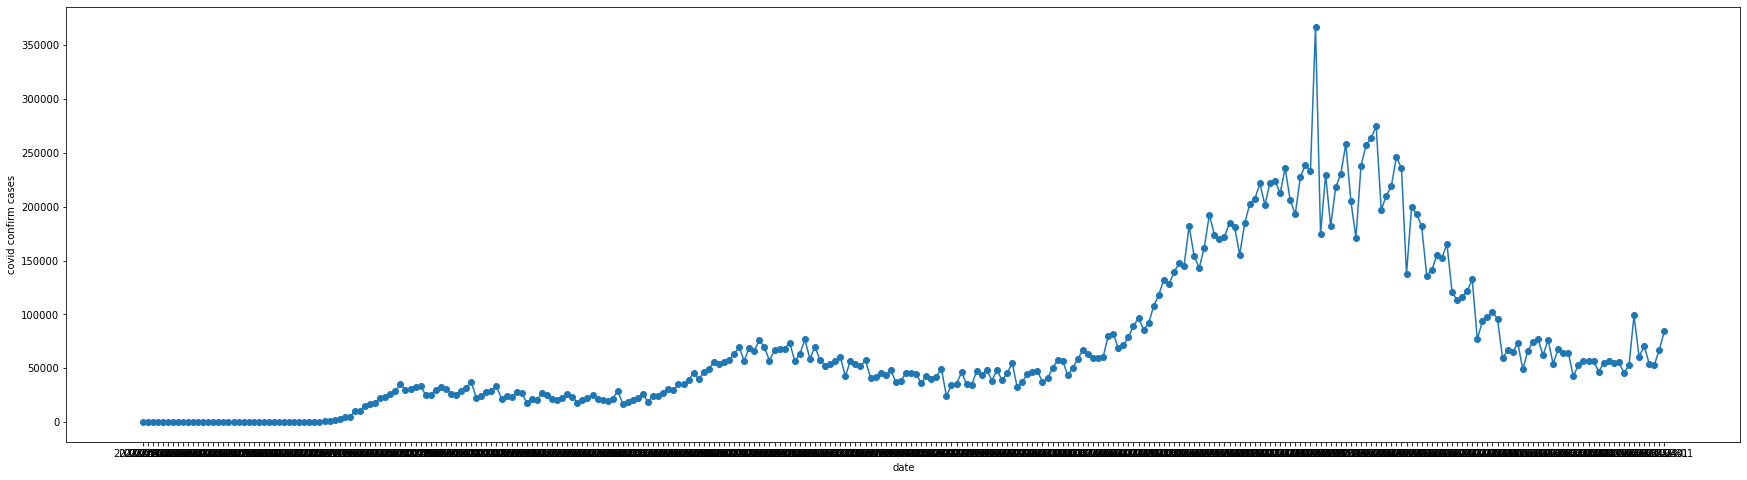

In [158]:
plt.scatter(z,y)
plt.plot(z,y)
# plt.axvline(x=x,ymin=min(z),ymax=max(z),color='g',linewidth=1)
plt.rcParams["figure.figsize"] = (30,3)
plt.ylabel("covid confirm cases")
plt.xlabel("date")
plt.show()

In [159]:
df = pd.read_csv('US_deaths.csv')
df_d = df.drop(columns=['State']).T


In [160]:
df_d = df_d.diff().fillna(df_d.iloc[0])
df_d['cases'] = df_d.sum(axis=1)
df_d['date'] = df_d.index
df_deaths = df_d[['cases','date']]

In [161]:
df_death_merged = pd.merge(left=df_ndxt, right=df_deaths, left_on='Date', right_on='date')

In [162]:
x2 = df_death_merged['Close'].to_numpy()
y2 = df_death_merged['cases'].to_numpy()
z2 = df_death_merged['date'].to_numpy()

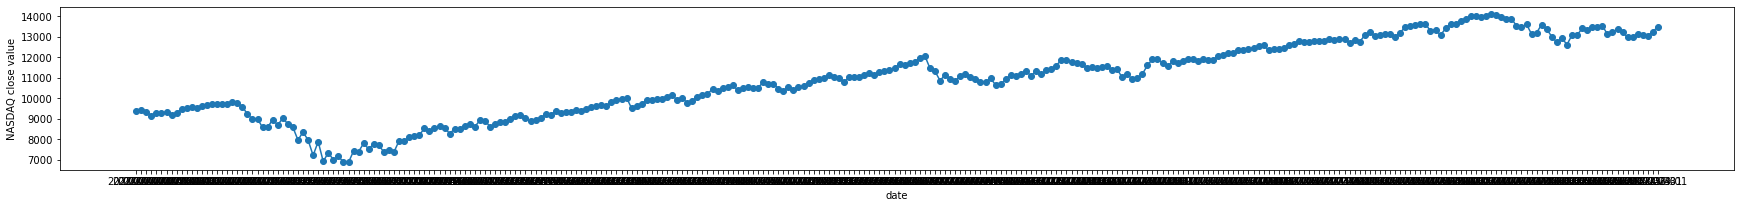

In [163]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(z2,x2)
plt.plot(z2,x2)
#plt.plot(z,y)
# plt.axvline(x=x,ymin=min(z),ymax=max(z),color='g',linewidth=1)

plt.rcParams["figure.figsize"] = (30,3)
plt.ylabel("NASDAQ close value")
plt.xlabel("date")
plt.show()

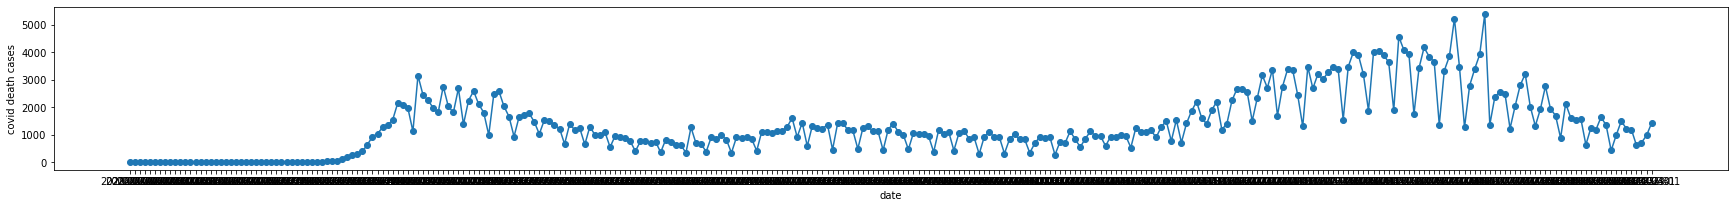

In [164]:
plt.scatter(z2,y2)
plt.plot(z2,y2)
# plt.axvline(x=x,ymin=min(z),ymax=max(z),color='g',linewidth=1)

plt.rcParams["figure.figsize"] = (30,3)
plt.ylabel("covid death cases")
plt.xlabel("date")
plt.show()

In [165]:
#Pearson correlation
#
import math
#X= np.array(y) #X dataset
#Y1 = np.array(z1) # Confirmed Cases 
#Y2 = np.array(z2) # Deaths 
mean_x = np.mean(x)
mean_y1 = np.mean(y)
mean_y2 = np.mean(y2)

xi_xbar = x-mean_x
y1i_ybar = y-mean_y1
y2i_ybar = y2-mean_y2

sq_xi_xbar = np.square(xi_xbar)
sq_y1i_ybar = np.square(y1i_ybar)
sq_y2i_ybar = np.square(y2i_ybar)


ro1 = sum(xi_xbar*y1i_ybar)/math.sqrt(sum(sq_xi_xbar)*sum(sq_y1i_ybar))
ro2 = sum(xi_xbar*y2i_ybar)/math.sqrt(sum(sq_xi_xbar)*sum(sq_y2i_ybar))

print(ro1)
print(ro2)
print('Sigma hat XY for confirmed Covid cases and NASDAQ price is '+str(ro1)+ " which is greater than 0.5. Therefore it signifies a positive correlation")
print('Sigma hat XY for Covid deaths and NASDAQ price is '+str(ro2)+ " which is also greater than 0.5. Therefore it signifies a positive correlation")

0.6563244100547485
0.5505505322024021
Sigma hat XY for confirmed Covid cases and NASDAQ price is 0.6563244100547485 which is greater than 0.5. Therefore it signifies a positive correlation
Sigma hat XY for Covid deaths and NASDAQ price is 0.5505505322024021 which is also greater than 0.5. Therefore it signifies a positive correlation


In [166]:
def chi_square(obs,rows,cols):
  obs.loc['tot_col']= obs.sum(numeric_only=True, axis=0)
  obs.loc[:,'tot_row'] = obs.sum(numeric_only=True, axis=1)
  exp = pd.DataFrame(columns=["Close","cases"])
  for col in exp.columns:
    for ind in obs.index:
      exp.loc[ind,col] = (obs.loc[ind,'tot_row'] * obs.loc['tot_col', col])/obs.loc['tot_col','tot_row']
    
  qObserved = np.sum(np.square(np.array((obs.iloc[:-1,:-1] - exp.iloc[:-1,:])).flatten())/np.array(exp.iloc[:-1,:]).flatten())
  print("Q Observed value calculated from Chi Square Test is: "+str(qObserved))
  print("Degree of freedom for the data is "+str(rows)) 


chi_square(df_merged[["Close","cases"]],df_merged.shape[0],df_merged.shape[1])
print("Calculated p value using q observed and degree of freedom is 0")
print("This means that NASDAQ price and covid cases are dependent by rejecting the independent hypothesis")

Q Observed value calculated from Chi Square Test is: 3437631.7545028636
Degree of freedom for the data is 302
Calculated p value using q observed and degree of freedom is 0
This means that NASDAQ price and covid cases are dependent by rejecting the independent hypothesis


/Users/mkhandelia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/mkhandelia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mkhandelia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [167]:
def points(arr):

  arr = sorted(arr)
  n = len(arr)
  x_arr_cdf = []
  y_arr_cdf = []
  y_arr_curr = 0

  x_arr_cdf.append(0)
  y_arr_cdf.append(0)

  for i in arr:
    y_arr_curr += 1/n
    y_arr_cdf.append(y_arr_curr)
    x_arr_cdf.append(i)

  return x_arr_cdf,y_arr_cdf

def plot_eCDF(X_1, Y_1, X_2, Y_2, diff_max, ind):
    plt.figure(figsize=(10,5))
    plt.step(X_1, Y_1, where="post", label="CDF-Data1")
    plt.step(X_2, Y_2, where="post", label="CDF-Data2")
    plt.yticks(np.arange(0, 1.1, 1/10))
    plt.title("ECDF")
    plt.xlabel("Data Points")
    plt.ylabel("P[X<x]")
    plt.scatter([ind],[0], color='red', marker='x', s=100, label=f'Maximum Difference {diff_max} at {ind}')
    plt.grid(which="both")
    plt.legend()
    plt.show()

def ks_test(d1,d2, th=0.05, d=True):
  X_1, Y_1 = points(d1)
  X_2, Y_2 = points(d2)

  length = int(min([max(X_1),max(X_2)])) +10

  Y_1_all = []
  flag=0
  for i in np.arange(length):
    ind = np.where(np.array(X_1) == i)[0]
    if len(ind)==0:
      Y_1_all.append(flag)
    else:
      Y_1_all.append(Y_1[ind[-1]])
      flag = Y_1[ind[-1]]

  Y_2_all = []
  flag=0
  for i in np.arange(length):
    ind = np.where(np.array(X_2) == i)[0]
    if len(ind)==0:
      Y_2_all.append(flag)
    else:
      Y_2_all.append(Y_2[ind[-1]])
      flag = Y_2[ind[-1]]

  diff=[]
  for i in range(length):
    diff.append( np.absolute( Y_1_all[i] - Y_2_all[i]  ) )

  diff_max = np.max(diff)

  max_ind = np.argmax(diff)

  if d:
    plot_eCDF(X_1,Y_1,X_2,Y_2, diff_max, max_ind)

  if diff_max > th:
    print(f"Maximum value = {diff_max} > C: {th}, We reject H0")
  else:
    print(f"Maximum value = {diff_max} <= C: {th}, We reject H0")

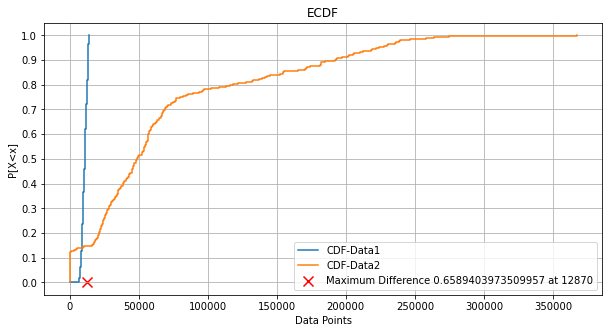

Maximum value = 0.6589403973509957 > C: 0.05, We reject H0


In [168]:
ks_test(df_merged['Close'],df_merged['cases'])